In [694]:
import numpy as np
import cv2
import matplotlib as plt

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [695]:
image = cv2.imread('KTP_Wildan.jpg')

In [696]:
image.shape

(1600, 1200, 3)

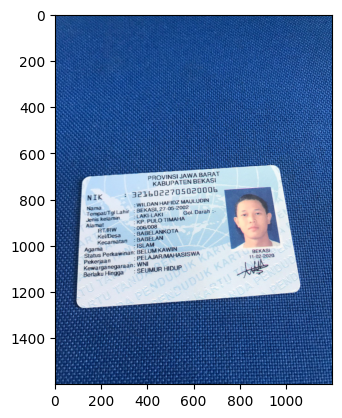

In [697]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

# !!!!

In [698]:
def do_perspective_transformation(rgb, input):
    height, width = rgb.shape[:2]

    output = np.float32([[0,0], [width -1, 0], [width -1, height -1], [0, height -1]])

    matrix = cv2.gerspectiveTransform(input, output)
    print(matrix.shape)
    print(matrix)

    imgOutput = cv2.warpPerspective(rgb, matrix, (width, height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTAIN, borderValue=(0,0,0))

    print(imgOutput.shape)
    return imgOutput

def get_array_of_coordinate(rgb):
    gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
    blur = cv2.medianBlur(gray, 1)
    _, thresh = cv2.threshold(blur, 200 ,255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
        area = cv2.contourArea(cnt)
        points = approx.ravel()
        if area > 500 and len(approx) == 4:
            print(area)
            print(points)
            c1 = (points[0], points[1])
            c2 = (points[2], points[3])
            c3 = (points[4], points[5])
            c4 = (points[6], points[7])
            cv2.circle(rgb, c1, 3, (255, 255, 0), -1)
            cv2.circle(rgb, c2, 3, (255, 255, 0), -1)
            cv2.circle(rgb, c3, 3, (255, 255, 0), -1)
            cv2.circle(rgb, c4, 3, (255, 255, 0), -1)

            sorted_list = sorted([c1,c2,c3,c4])
            input = np.float32([sorted_list[0], sorted_list[2], sorted_list[3], sorted_list[1],])
            transformed_image = do_perspective_transformation(rgb, input)
            cv2.imshow('transformed_image', transformed_image)
    numpy_horizontal = np.hstack((thresh, blur))
    cv2.imshow("result", numpy_horizontal)
    cv2.imshow("rgb", rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



approx [[[ 965  667]]

 [[ 132  708]]

 [[  99 1258]]

 [[1035 1206]]]
[ 965  667  132  708   99 1258 1035 1206]


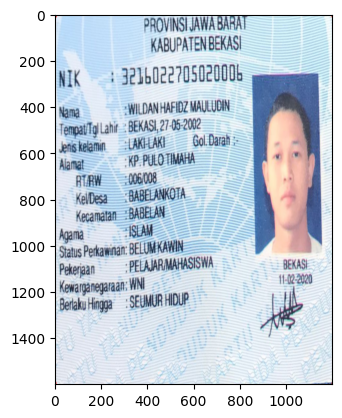

In [699]:
def do_perspective_transformation(rgb, input_array):
   height, width = rgb.shape[:2]
   input_array = np.float32(input_array)
   output_array = np.float32([(0,0), (width, 0), (width, height), (0, height)])
   matrix = cv2.getPerspectiveTransform(input_array, output_array)
   result = cv2.warpPerspective(rgb, matrix, (width, height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
   return result


gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
blur = cv2.medianBlur(gray, 1)
_, thresh = cv2.threshold(blur, 0 , 255, cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    area = cv2.contourArea(cnt)
    if len(approx) == 4 and area>100:
      print('approx', approx)
      points = approx.ravel()
      print(points)
      c1 = (points[0], points[1])
      c2 = (points[2], points[3])
      c3 = (points[4], points[5])
      c4 = (points[6], points[7])
      cv2.circle(rgb, c1, 5, 255, -1)
      cv2.circle(rgb, c2, 5, 255, -1)
      cv2.circle(rgb, c3, 5, 255, -1)
      cv2.circle(rgb, c4, 5, 255, -1)
      sorted_list = sorted([c1,c2,c3,c4])
      input = [sorted_list[0], sorted_list[2], sorted_list[3], sorted_list[1],]
      transformed_image = do_perspective_transformation(rgb, input_array=[c2,c1,c4,c3])
      plt.imshow(transformed_image)




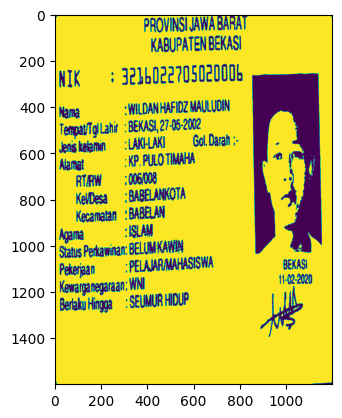

In [736]:
bgr = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# Test erode
erode = cv2.erode(gray, np.ones((1,1)))
# Test Otsu
_, otsu = cv2.threshold(erode, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu)

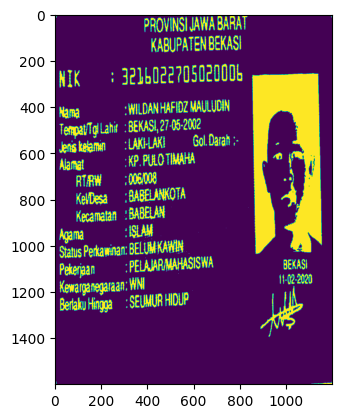

In [737]:
# inverse image since we trained out model
# with black background
invertion = 255 - otsu
# check
plt.imshow(invertion)

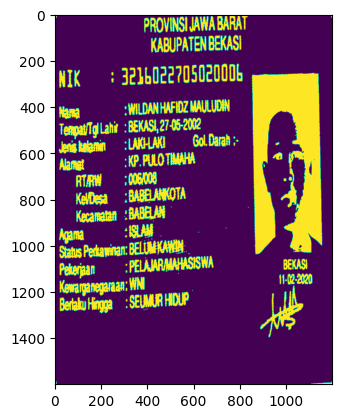

In [738]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
# check
plt.imshow(dilation)